# Operations and Inventory Management
Monitor the availability, occupancy and efficient operation of tourist accommodations.

**Objective**  
This part is dedicated to Operations and Inventory analysis of tourist accommodations.

**Objective Sprint 2**  
What impact does the auto-book option (without owner review) have on average availability in each city?

**Description and characteristics of dataset**  
Pre-processed dataframe with tourist accommodations listings.

In [8]:
# import libraries 
import os
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import scipy.stats as stats

warnings.filterwarnings("ignore")

In [9]:
# font sizes
plt.rcParams['figure.titlesize'] = 18 
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['font.size'] = 14             
plt.rcParams['axes.labelsize'] = 14  

plt.rcParams['xtick.labelsize'] = 12      
plt.rcParams['ytick.labelsize'] = 12       
plt.rcParams['legend.fontsize'] = 12

# display settings
#pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', '{:.2f}'.format)
 
# set palette
custom_palette = ['#4e6e81', '#a79e9c', '#b3bcc3', '#f2f1f1', '#888f96', '#256fb6', '#ecf0f5', '#354859', '#f69731']
sns.set_palette(custom_palette)

sns.set_style("whitegrid")

## Data Loading

In [10]:
PATH = 'Data'
FILENAME = 'Tourist_Accommodation31032025.csv'

In [11]:
# define function to read file
def read_file(filename):
    
    """Input: number of sprint.
    Function reads .csv data of desired sprint. 
    Output: Dataframe or error.
    """
    
    # reading file
    try:
        df = pd.read_csv(os.path.join('..', PATH, filename), 
                         parse_dates=['insert_date', 'first_review_date', 'last_review_date'])
        display(df.head())
        return df
    except Exception as error:
        print("An exception occurred:", error)
        return error      

In [12]:
data = read_file(FILENAME)

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,beds,amenities_list,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,standardized_city,standardized_neighbourhood,autonomous_community,has_reviews
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,NaN,Private room,2,2.00,1.00,1.00,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",400.00,3,365,1,7,20,40,130,78,2010-01-02,2017-09-05,970.00,100.00,100.00,100.00,100.00,100.00,100.00,0,75.00,spain,malaga,2018-07-31,Málaga,Centro,Andalucía,True
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1.00,1.00,1.00,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",170.00,4,40,1,0,0,0,162,33,2014-10-10,2018-07-15,920.00,90.00,90.00,100.00,100.00,80.00,90.00,0,52.00,spain,madrid,2020-01-10,Madrid,Los Cármenes,Comunidad de Madrid,True
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1.00,2.00,2.00,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",990.00,2,120,1,26,31,31,270,148,2011-01-05,2019-07-22,980.00,100.00,100.00,100.00,100.00,100.00,100.00,1,142.00,spain,sevilla,2019-07-29,Sevilla,San Vicente,Andalucía,True
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2.00,1.00,1.00,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",400.00,2,730,1,9,23,49,300,292,2012-03-13,2020-01-04,940.00,100.00,90.00,100.00,100.00,100.00,90.00,1,306.00,spain,barcelona,2020-01-10,Barcelona,L'Antiga Esquerra de l'Eixample,Cataluña,True
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,NaN,Private room,5,1.00,2.00,5.00,"Wifi,Pool,Free parking on premises,Breakfast,P...",900.00,1,180,1,0,19,49,312,36,2011-07-08,2018-08-08,970.00,100.00,100.00,100.00,100.00,100.00,100.00,0,39.00,spain,girona,2019-02-19,Girona,Quart,Cataluña,True


## Data Overview

In [13]:
# define function to display information about the data
def data_info(df):
   
    """Input: dataframe.
    Function displays basic information, 
    checks for duplicates and NaN. 
    """
    
    # get information about the data
    print(df.info())
    
    # number of unique values for each column
    print()
    print('\033[1mNumber of unique values')
    display(df.nunique())

    # check for NaN
    if df.isna().sum().sum() > 0:
        print()
        print('\033[1mNumber of missing values')
        display(
            pd.DataFrame({'number': df.isna().sum(), 
                          'percentage': df.isna().mean().mul(100)})
            .query('number > 0')
            .sort_values(by='number', ascending=False)
        )
    else:
        print('There are no NaNs in the data\n')
    
    # check for duplicates (without id columns)
    print()
    if df.iloc[:,1:].duplicated().sum() > 0:
        print('Data contain full duplicates\n')
    else:
        print('There are no full duplicates in the data\n')

In [14]:
data_info(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7693 entries, 0 to 7692
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   apartment_id                 7693 non-null   int64         
 1   name                         7690 non-null   object        
 2   description                  7643 non-null   object        
 3   host_id                      7693 non-null   int64         
 4   neighbourhood_name           7693 non-null   object        
 5   neighbourhood_district       4669 non-null   object        
 6   room_type                    7693 non-null   object        
 7   accommodates                 7693 non-null   int64         
 8   bathrooms                    7652 non-null   float64       
 9   bedrooms                     7654 non-null   float64       
 10  beds                         7685 non-null   float64       
 11  amenities_list               7677 non-null 

apartment_id                   7693
name                           7667
description                    7610
host_id                        5887
neighbourhood_name              492
neighbourhood_district           61
room_type                         4
accommodates                     20
bathrooms                        13
bedrooms                         14
beds                             24
amenities_list                 7567
price                           504
minimum_nights                   41
maximum_nights                  135
has_availability                  2
availability_30                  31
availability_60                  61
availability_90                  91
availability_365                366
number_of_reviews               318
first_review_date              1938
last_review_date               1467
review_scores_rating             46
review_scores_accuracy            9
review_scores_cleanliness         9
review_scores_checkin             8
review_scores_communication 


Number of missing values


,number,percentage
neighbourhood_district,3024,39.31
review_scores_value,1649,21.44
review_scores_location,1649,21.44
review_scores_checkin,1648,21.42
review_scores_accuracy,1643,21.36
review_scores_communication,1639,21.31
review_scores_cleanliness,1637,21.28
review_scores_rating,1634,21.24
last_review_date,1555,20.21
reviews_per_month,1554,20.20



There are no full duplicates in the data



## EDA

In [15]:
df = data[['apartment_id', 'insert_date', 'standardized_city', 'price', 'is_instant_bookable', 'availability_30',
       'availability_60', 'availability_90', 'availability_365']] 
df = df.rename(columns={"standardized_city": "city"})

In [16]:
# descriptive statistics
df[['availability_30', 'availability_60', 'availability_90', 'availability_365']].describe().T

,count,mean,std,min,25%,50%,75%,max
availability_30,7693.00,12.40,11.55,0.00,0.00,10.00,24.00,30.00
availability_60,7693.00,27.60,22.48,0.00,2.00,27.00,50.00,60.00
availability_90,7693.00,44.57,33.10,0.00,9.00,47.00,76.00,90.00
availability_365,7693.00,187.70,129.89,0.00,66.00,188.00,316.00,365.00


### is_instant_bookable

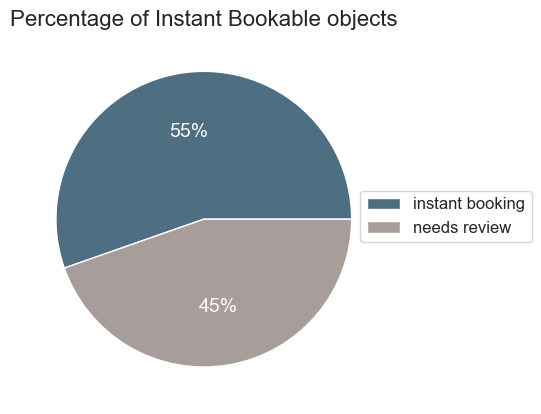

In [17]:
# pieplot
df['is_instant_bookable'].value_counts(normalize=True).plot(
    kind='pie',
    labels=["instant booking", "needs review"],
    wedgeprops = {'linewidth': 1, 'edgecolor': 'white'},
    autopct='%.0f%%',
    textprops={'color': 'white'})

plt.legend(bbox_to_anchor=(0.9, 0.6), loc='upper left')
plt.title('Percentage of Instant Bookable objects')
plt.ylabel(None)
plt.show()

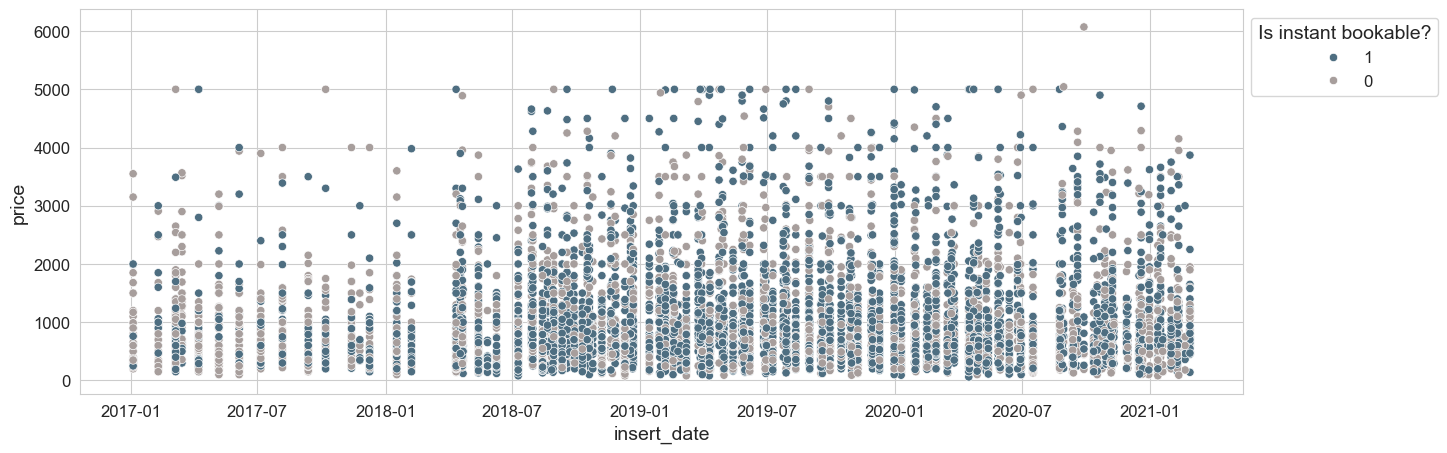

In [18]:
# distribution of has_availability values over time
plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x='insert_date', y='price', hue=df['is_instant_bookable'], hue_order=[1,0])

plt.legend(title='Is instant bookable?',
          bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

### Availability

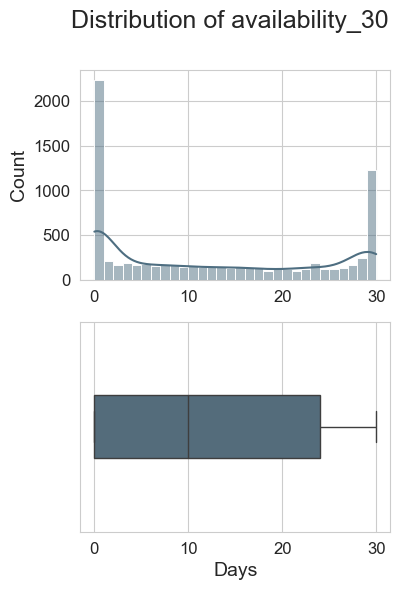

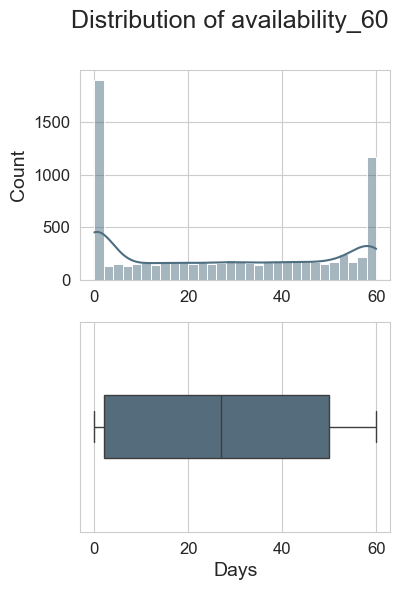

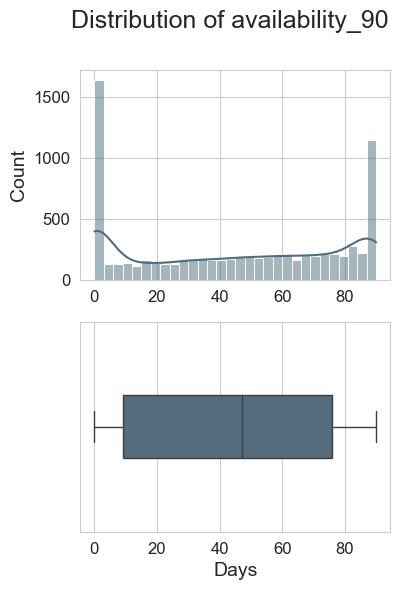

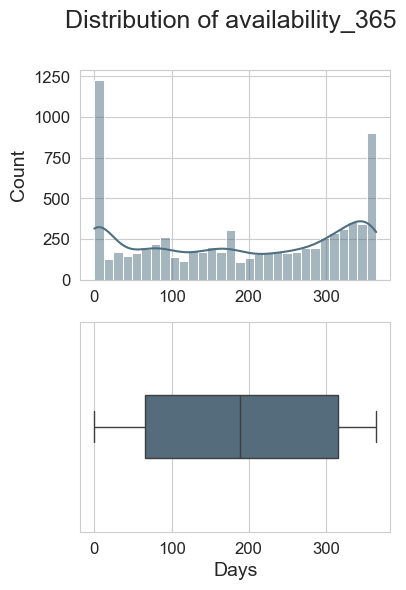

In [19]:
# distribution of nubers of available days in the different terms 
for col in ['availability_30', 'availability_60', 'availability_90', 'availability_365']:
    fig, axs = plt.subplots(2, 1, figsize=(4, 6))
    fig.suptitle(f"Distribution of {col}")
    
    # histogram
    sns.histplot(data=df[col]
                  , kde=True, bins=30
                  , ax=axs[0]).set(xlabel=None)
    
    # boxplot
    (sns.boxplot(data=df, ax=axs[1], x=col, width=0.3, orient='h')
        .set(yticklabels=[], xlabel='Days')
    )
    plt.show()

## Data Transformation

Let's transform data into the long format and add availability in % to easily compare between different time periods.

In [20]:
# transform dataframe into the long format 
df_long = df.copy().rename(columns={
    "availability_30": 30, "availability_60": 60, 
    "availability_90": 90, "availability_365": 365
})
df_long = df_long.melt(id_vars=['city', 'is_instant_bookable'], 
                       value_vars=[30, 60, 90, 365], 
                       var_name='period', 
                       value_name='availability')

# change period data type to integer
df_long['period'] = df_long['period'].astype(int)

In [21]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30772 entries, 0 to 30771
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 30772 non-null  object
 1   is_instant_bookable  30772 non-null  int64 
 2   period               30772 non-null  int64 
 3   availability         30772 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 961.8+ KB


In [22]:
# add column with percentage of availability
df_long['availability_percentage'] = df_long['availability'] / df_long['period'] * 100
df_long

,city,is_instant_bookable,period,availability,availability_percentage
0,Málaga,0,30,7,23.33
1,Madrid,0,30,0,0.00
2,Sevilla,1,30,26,86.67
3,Barcelona,1,30,9,30.00
4,Girona,0,30,0,0.00
...,...,...,...,...,...
30767,Barcelona,1,365,363,99.45
30768,Sevilla,0,365,41,11.23
30769,Palma,1,365,184,50.41
30770,Barcelona,1,365,315,86.30


In [23]:
print('Average availability per period, days:')
print(df_long.groupby('period').availability.mean())
print()
print('Average availability per period, %:')
print(df_long.groupby('period').availability_percentage.mean())

Average availability per period, days:
period
30     12.40
60     27.60
90     44.57
365   187.70
Name: availability, dtype: float64

Average availability per period, %:
period
30    41.35
60    46.00
90    49.52
365   51.43
Name: availability_percentage, dtype: float64


Many objects show availability clustered around 0 days or near the upper limit of each period (30, 60, 90, 365 days). This suggests that properties are either almost fully booked or have very low booking activity. Let's add a categorical column for these two cases vith values: 
- 1 if an object has no available days (`availability` == 0)
- 0 if an object has 90% or more days without reservations (`availability_percentage` >= 0.9)
- NaN for all other cases

In [24]:
# add columns with occupancy type 
df_long['is_fully_booked'] = np.where(df_long['availability']==0, 1, 0)
df_long['is_empty'] = np.where(df_long['availability'] >= df_long['period']*0.9, 1, 0)

## Buisness Question
What impact does the auto-book option (without owner review) have on average availability in each city?

### General availability
Does auto-book option affect availability in general?

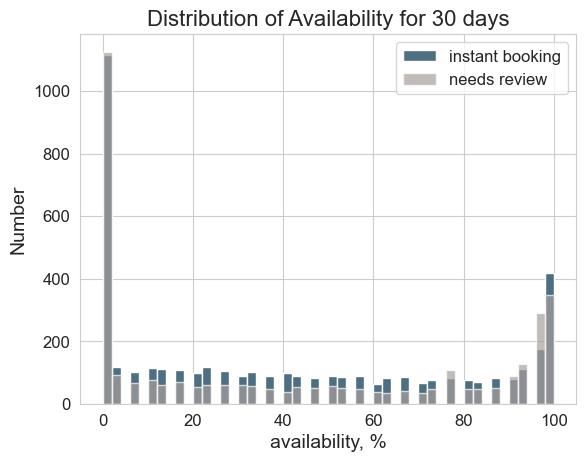

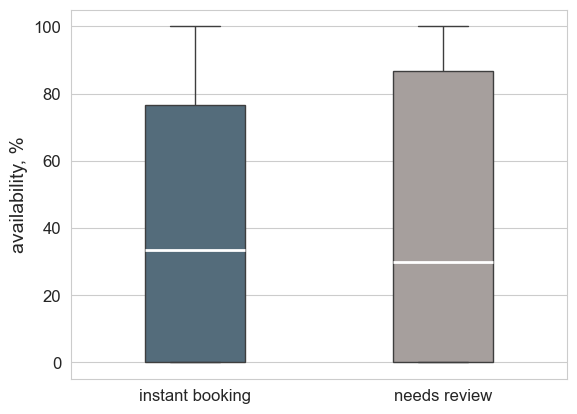

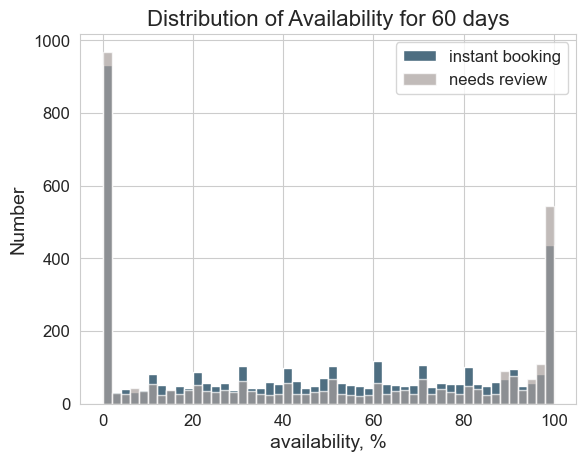

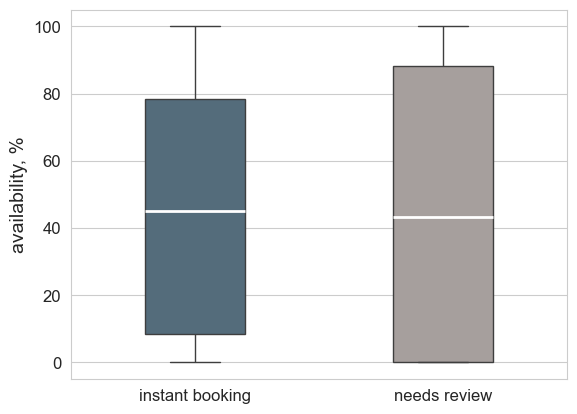

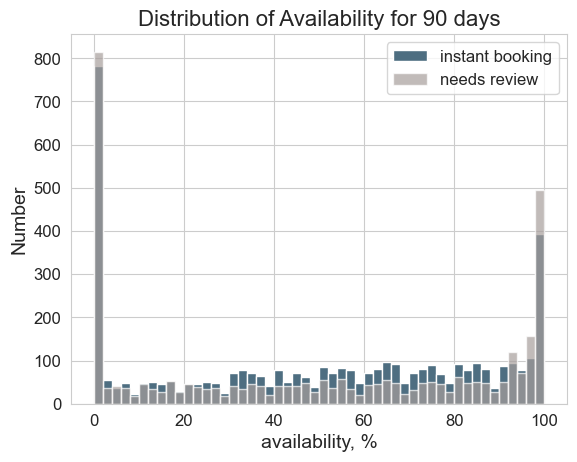

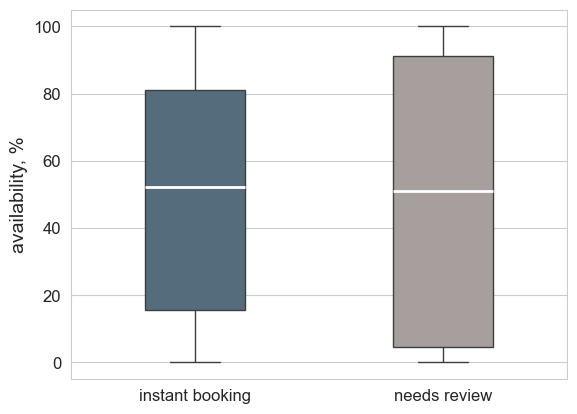

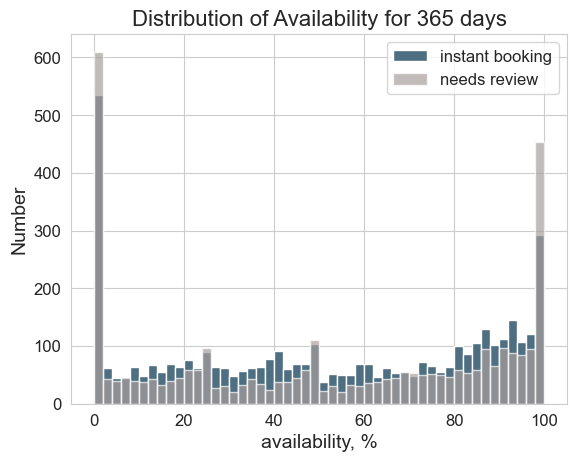

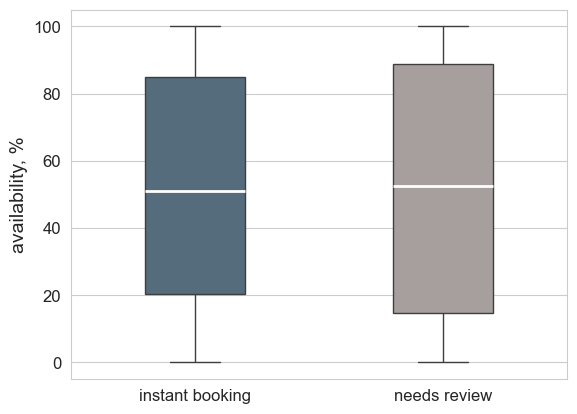

In [25]:
for per in df_long['period'].unique():
    # hist
    df_long.query('period==@per and is_instant_bookable==1')['availability_percentage'].hist(bins=50)
    df_long.query('period==@per and is_instant_bookable==0')['availability_percentage'].hist(bins=50, alpha=0.7)
    
    plt.title(f'Distribution of Availability for {per} days')
    plt.ylabel('Number')
    plt.xlabel('availability, %')
    plt.legend(['instant booking', 'needs review'])
    plt.show()
    
    # boxplot
    sns.boxplot(
        data=df_long.query('period==@per'),
        x='is_instant_bookable',
        y='availability_percentage',
        hue='is_instant_bookable', 
        order=[1, 0],
        hue_order=[1, 0],
        width=0.4, legend=False,
        medianprops={"color": "w", "linewidth": 2}
    )
    
    plt.xlabel(None)
    plt.xticks(ticks=[0, 1], labels=['instant booking', 'needs review'])
    plt.ylabel('availability, %')
    plt.show()
    print()

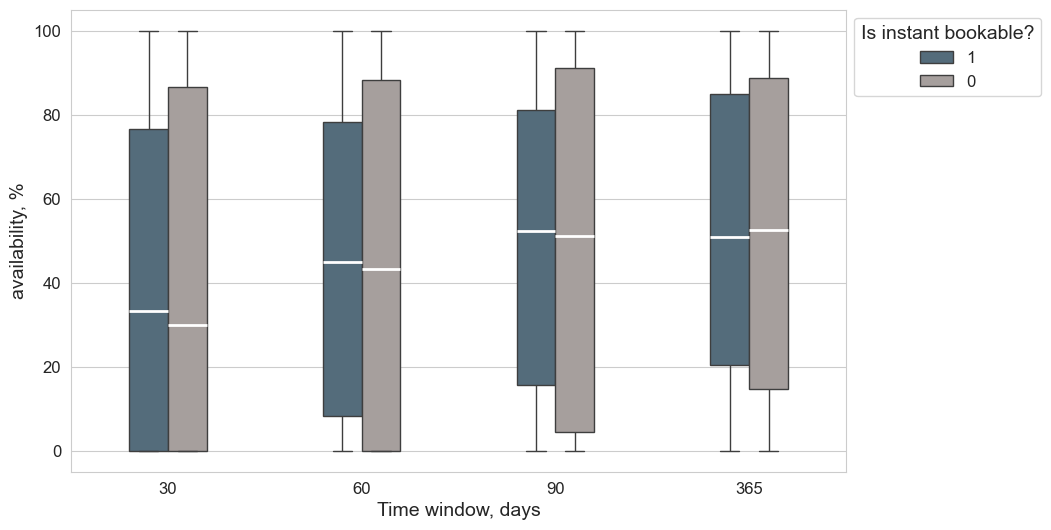

In [26]:
# box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_long, x='period', y='availability_percentage', 
            hue='is_instant_bookable',
            hue_order=[1,0],
            width=0.4, medianprops={"color": "w", "linewidth": 2})

plt.ylabel('availability, %')
plt.xlabel('Time window, days')
plt.legend(title='Is instant bookable?', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

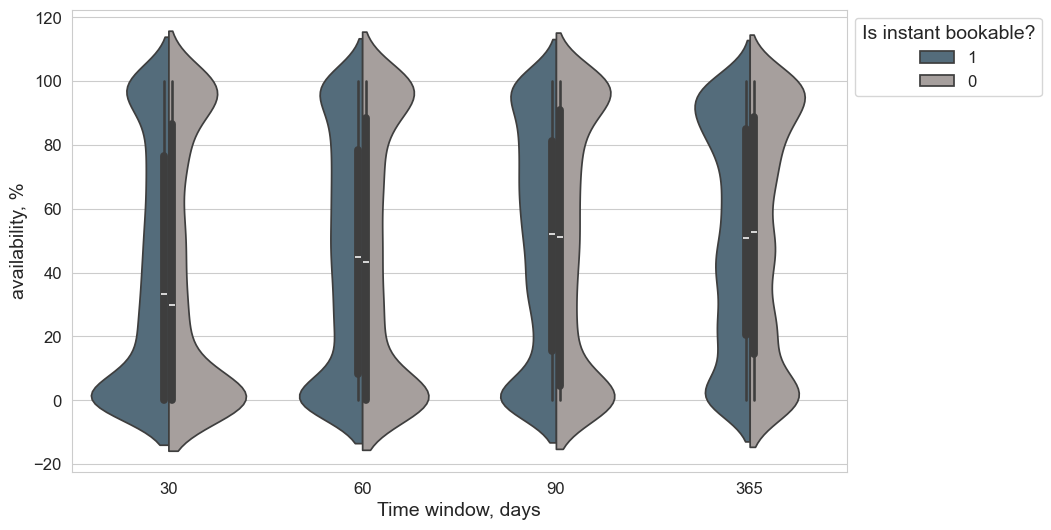

In [27]:
# violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_long, x='period', y='availability_percentage', 
               hue='is_instant_bookable', split=True,
               hue_order=[1,0])


plt.ylabel('availability, %')
plt.xlabel('Time window, days')
plt.legend(title='Is instant bookable?', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

**Statistical Significance** 

Hypothesis Testing  
The auto-booking option does not seem to have a significant impact on availability across different time windows. Let's statistically test whether the average availability differs between properties with and without the auto-booking option.  
- H₀ (Null Hypothesis): The average availability (across different time windows) is the same for properties with and without the auto-booking option.
- H₁ (Alternative Hypothesis): The average availability (across different time windows) differs between properties with and without the auto-booking option.

In [28]:
alpha = .05

# Mann-Whitney U test for two independent samples
for per in df_long['period'].unique():
    
    # two groups
    instant = df_long.query('period==@per and is_instant_bookable==1')['availability']
    review = df_long.query('period==@per and is_instant_bookable==0')['availability']
    
    u_stat, p_value = stats.mannwhitneyu(instant, review, alternative='two-sided')

    print(f'Availability across {per} days')
    print(f"Mann-Whitney U Test:")
    print(f"U Statistic = {u_stat}, p-value = {p_value}")
    if p_value < alpha:
        print("Reject null hypothesis\n")
    else:
        print("Fail to reject null hypothesis\n")
    print('******\n')

Availability across 30 days
Mann-Whitney U Test:
U Statistic = 7371968.0, p-value = 0.5351499508180747
Fail to reject null hypothesis

******

Availability across 60 days
Mann-Whitney U Test:
U Statistic = 7339770.0, p-value = 0.7784289519609018
Fail to reject null hypothesis

******

Availability across 90 days
Mann-Whitney U Test:
U Statistic = 7296190.5, p-value = 0.8640649711451885
Fail to reject null hypothesis

******

Availability across 365 days
Mann-Whitney U Test:
U Statistic = 7231549.0, p-value = 0.4015005467088629
Fail to reject null hypothesis

******



**Conclusion**: The null hypothesis of equality of average availability for properties with and without the auto-booking option could not be rejected. Based on the available data, we have no reason to claim that the average availability in different time windows for properties with and without the auto-booking option differ significantly.

### Fully-booked properties
Does auto-booking option affect number of fully-booked properties?

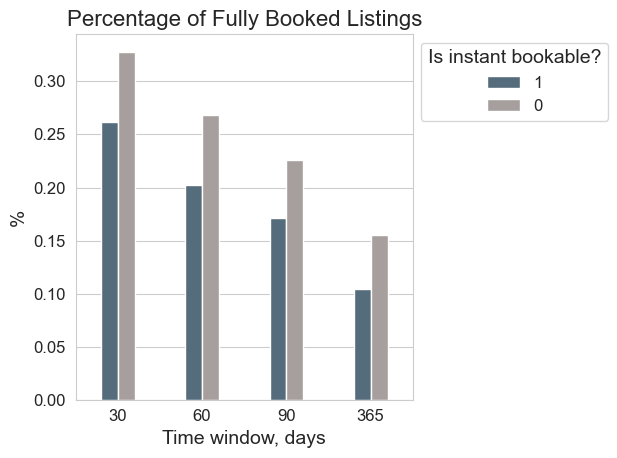

In [29]:
res = (df_long
       .groupby(['period', 'is_instant_bookable'], as_index=False)['is_fully_booked']
       .agg(lambda x: sum(x) / len(x))
      )

sns.barplot(data=res, y='is_fully_booked', x='period',
            hue='is_instant_bookable', 
            hue_order=[1, 0],
            width=0.4,
            )

plt.title(f'Percentage of Fully Booked Listings')
plt.ylabel('%')
plt.xlabel('Time window, days')
plt.legend(title='Is instant bookable?', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Statistical Significance** 

Hypothesis Testing  
Let's perform a statistical test comparing the proportion of fully-booked properties between listings that allow instant booking and those that require manual approval. 
- H₀ (Null Hypothesis): The proportion of fully-booked properties is the same for listings with and without the auto-booking option.
- H₁ (Alternative Hypothesis): The proportion of fully-booked properties differs between listings with and without the auto-booking option.

In [30]:
# Chi-Square Test
for per in df_long['period'].unique():
    
    # contingency table
    table = pd.crosstab(df_long.query('period==@per')['is_instant_bookable'], df_long.query('period==@per')['is_fully_booked']==1)
    
    chi2, p_value, _, _ = stats.chi2_contingency(table)

    print('******\n')
    print(f'Availability across {per} days')
    print(f"Chi-Square Test: chi2 = {chi2}, p-value = {p_value}")
    if p_value < alpha:
        print("Reject null hypothesis\n")
    else:
        print("Fail to reject null hypothesis\n")  

******

Availability across 30 days
Chi-Square Test: chi2 = 40.210417436611365, p-value = 2.2802903132271162e-10
Reject null hypothesis

******

Availability across 60 days
Chi-Square Test: chi2 = 45.52213016342466, p-value = 1.509239390284779e-11
Reject null hypothesis

******

Availability across 90 days
Chi-Square Test: chi2 = 36.311385646022586, p-value = 1.6817849272415605e-09
Reject null hypothesis

******

Availability across 365 days
Chi-Square Test: chi2 = 44.54563737680006, p-value = 2.484966078250391e-11
Reject null hypothesis



There is a significant association between instant booking option and number of fully-booked listings.

### Almost empty properties
Does auto-booking option affect number of empty properties? Empty - availability >= 90% (fo example, for period of 30 days - 27 or more days are available).

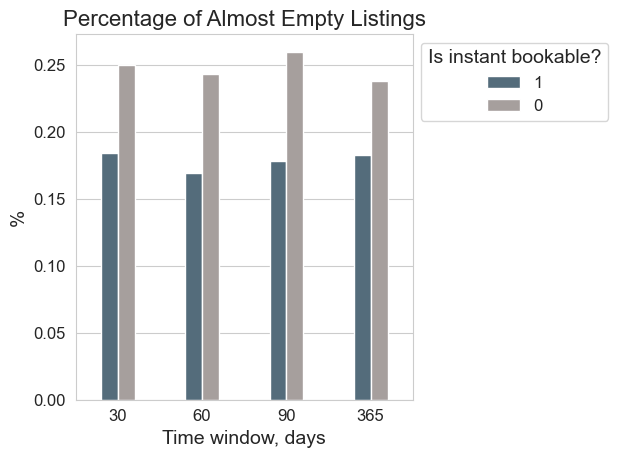

In [31]:
res = (df_long
       .groupby(['period', 'is_instant_bookable'], as_index=False)['is_empty']
       .agg(lambda x: sum(x) / len(x))
      )

sns.barplot(data=res, y='is_empty', x='period',
            hue='is_instant_bookable', 
            hue_order=[1, 0],
            width=0.4,
            )

plt.title(f'Percentage of Almost Empty Listings')
plt.ylabel('%')
plt.xlabel('Time window, days')
plt.legend(title='Is instant bookable?', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [32]:
# Chi-Square Test
for per in df_long['period'].unique():
    
    # contingency table
    table = pd.crosstab(df_long.query('period==@per')['is_instant_bookable'], df_long.query('period==@per')['is_empty']==1)
    
    chi2, p_value, _, _ = stats.chi2_contingency(table)

    print('******\n')
    print(f'Availability across {per} days')
    print(f"Chi-Square Test: chi2 = {chi2}, p-value = {p_value}")
    if p_value < alpha:
        print("Reject null hypothesis\n")
    else:
        print("Fail to reject null hypothesis\n")  

******

Availability across 30 days
Chi-Square Test: chi2 = 47.821651435322615, p-value = 4.6680825047409145e-12
Reject null hypothesis

******

Availability across 60 days
Chi-Square Test: chi2 = 63.87087786659836, p-value = 1.328469995684615e-15
Reject null hypothesis

******

Availability across 90 days
Chi-Square Test: chi2 = 74.51774415797557, p-value = 6.0095684780291306e-18
Reject null hypothesis

******

Availability across 365 days
Chi-Square Test: chi2 = 34.967507703995906, p-value = 3.352533300149459e-09
Reject null hypothesis



There is a significant association between instant booking option and number of almost fully available listings.

### By City

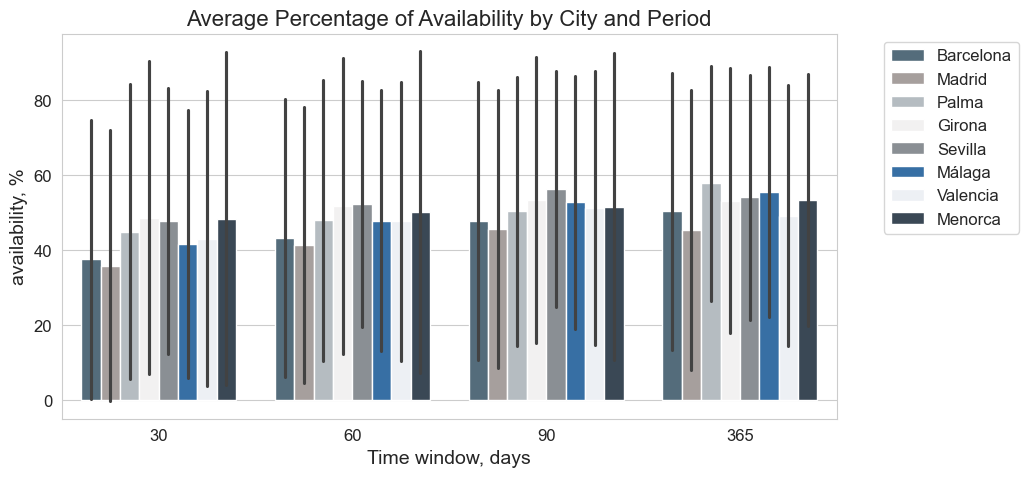

In [33]:
# availability por city
plt.figure(figsize=(10, 5))
sns.barplot(data=df_long, x='period', y='availability_percentage', 
            hue='city', errorbar='sd',
           hue_order=df['city'].value_counts().index)
plt.title('Average Percentage of Availability by City and Period')
plt.ylabel('availability, %')
plt.xlabel('Time window, days')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=None)
plt.show()

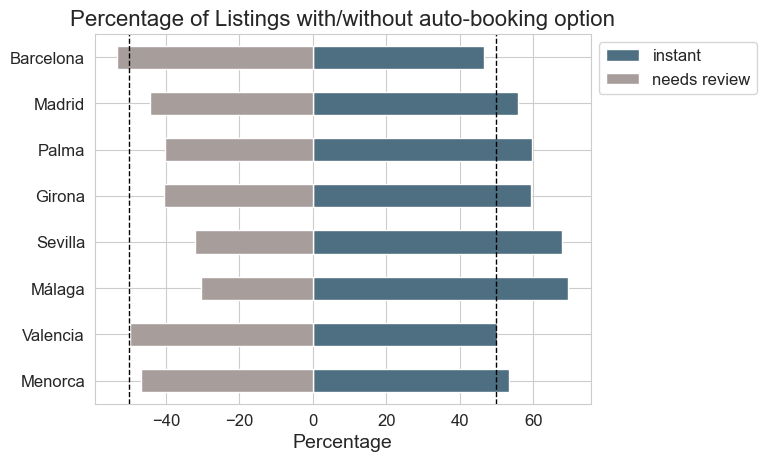

In [34]:
# percentage of listings with/without auto-booking option by city
(df[df['is_instant_bookable']==1]['city']
 .value_counts()
 .sort_index()
 .mul(100)
 .div(df['city'].value_counts().sort_index())
 .reindex(df['city'].value_counts().index)
).plot(kind='barh', label='instant')

(df[df['is_instant_bookable']==0]['city']
 .value_counts()
 .sort_index()
 .mul(-100)
 .div(df['city'].value_counts().sort_index())
 .reindex(df['city'].value_counts().index)
).plot(kind='barh', color='#a79e9c', label='needs review')

plt.title('Percentage of Listings with/without auto-booking option')
plt.xlabel('Percentage')
plt.ylabel(None)
plt.axvline(50, color='black', linestyle='--', linewidth=1)
plt.axvline(-50, color='black', linestyle='--', linewidth=1)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.gca().invert_yaxis()
plt.show()

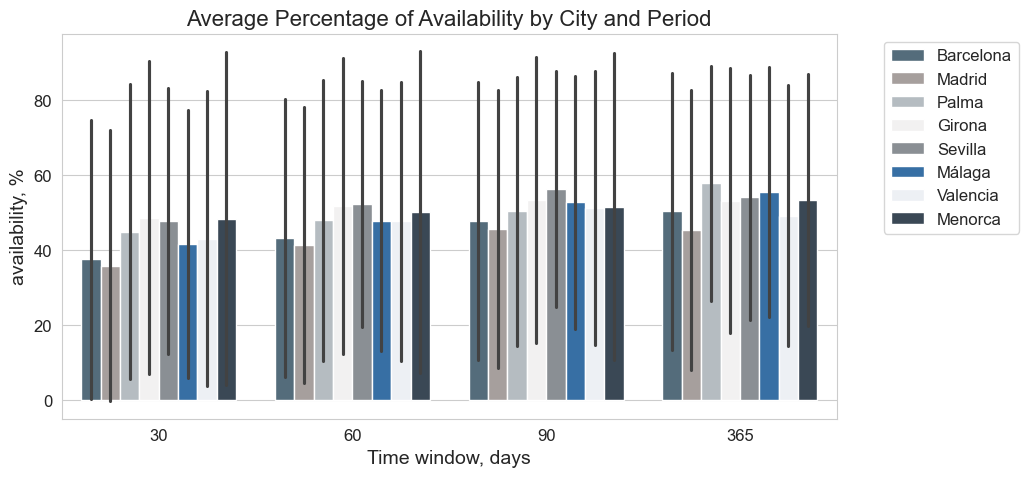

In [35]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_long, x='period', y='availability_percentage', 
            hue='city', errorbar='sd',
           hue_order=df['city'].value_counts().index)
plt.title('Average Percentage of Availability by City and Period')
plt.ylabel('availability, %')
plt.xlabel('Time window, days')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=None)
plt.show()

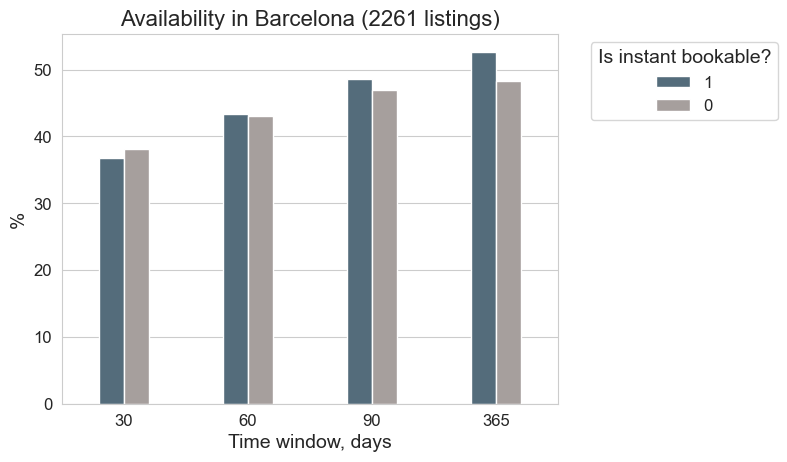

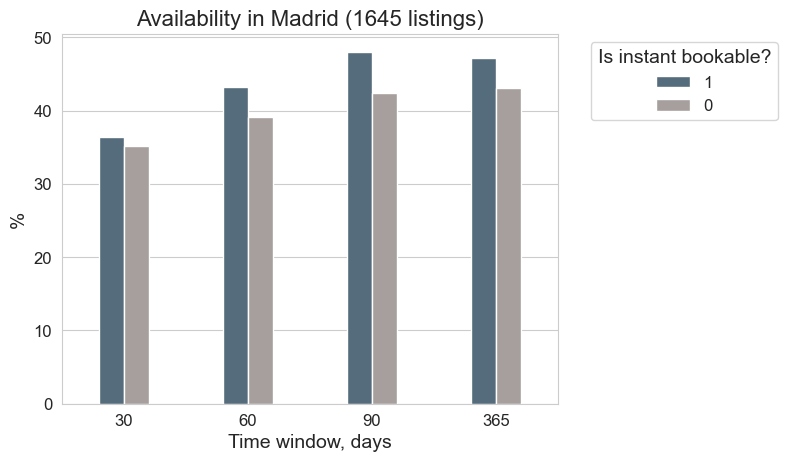

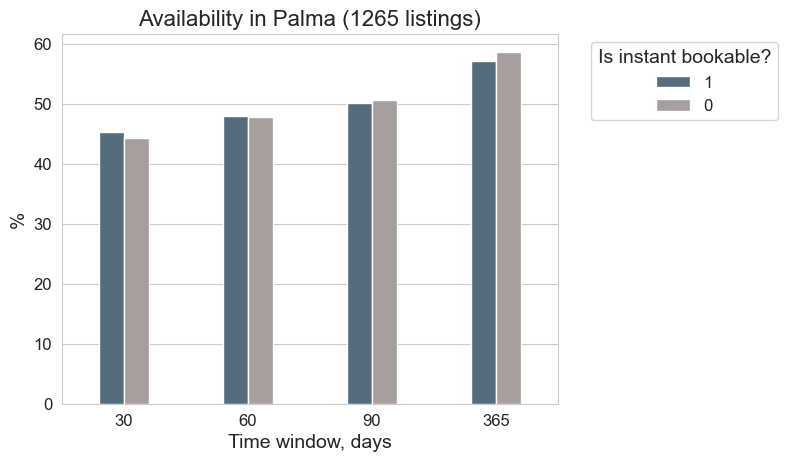

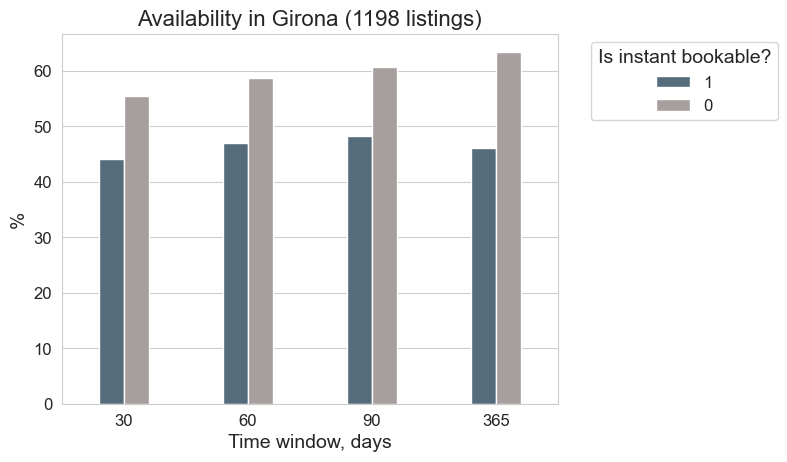

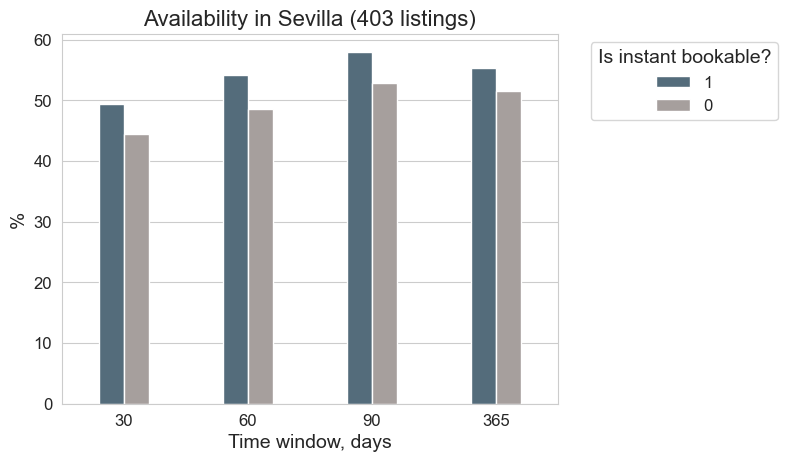

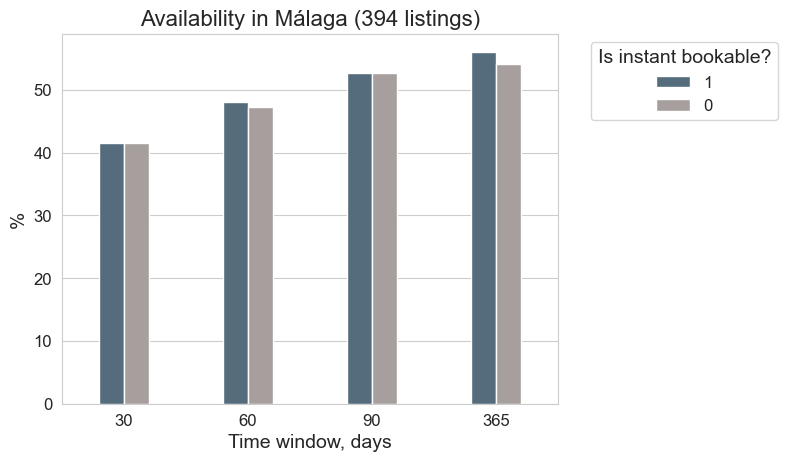

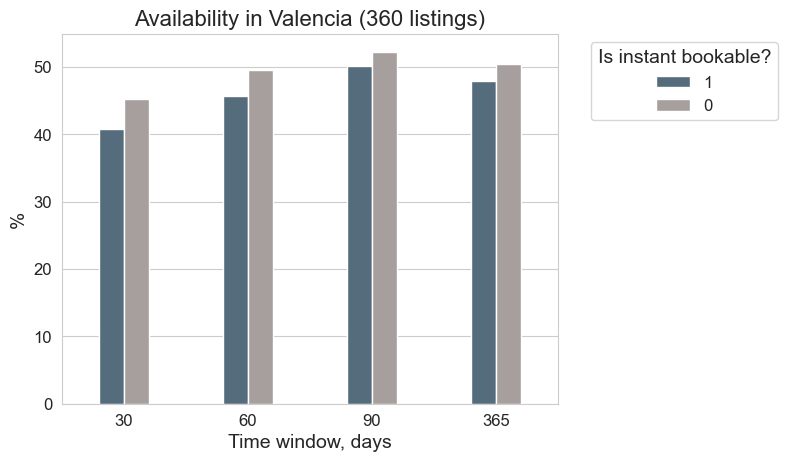

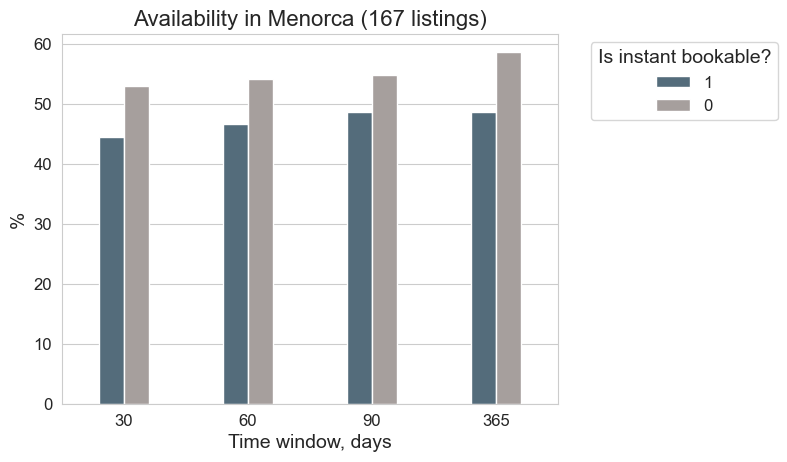

In [36]:
for city in df['city'].value_counts().index:
    
    # barplot
    sns.barplot(
        data=df_long.query('city==@city'),
        x='period',
        y='availability_percentage',
        hue='is_instant_bookable',
        errorbar=None,
        hue_order=[1, 0],
        width=0.4)
    

    plt.title(f"Availability in {city} ({df['city'].value_counts()[city]} listings)")
    plt.xlabel('Time window, days')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Is instant bookable?')
    plt.ylabel('%')
    plt.show()

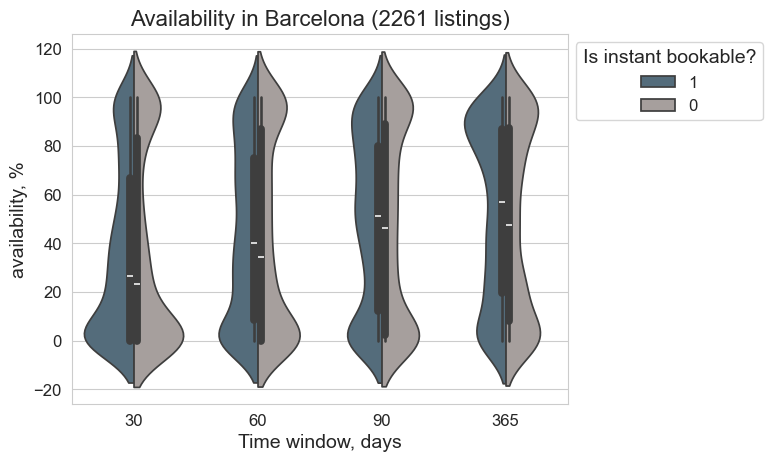

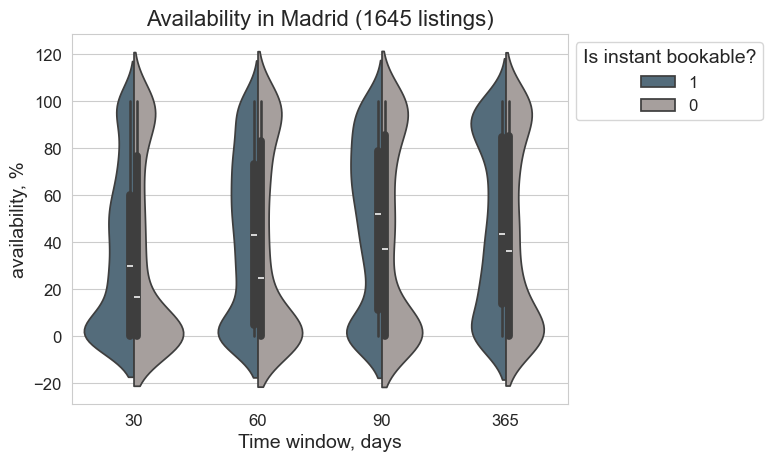

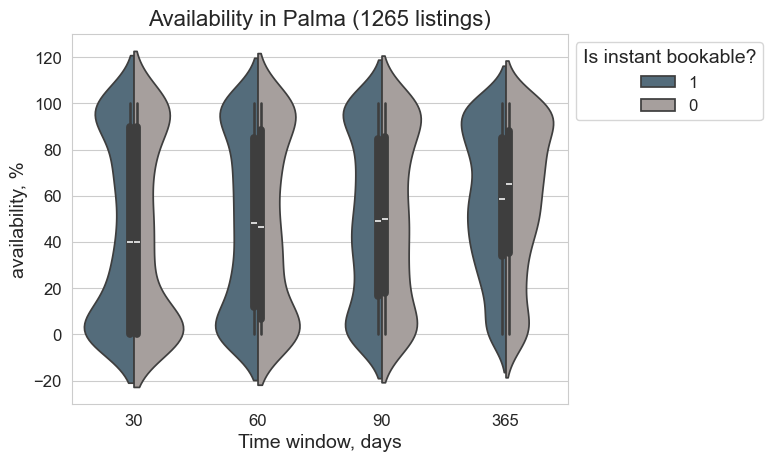

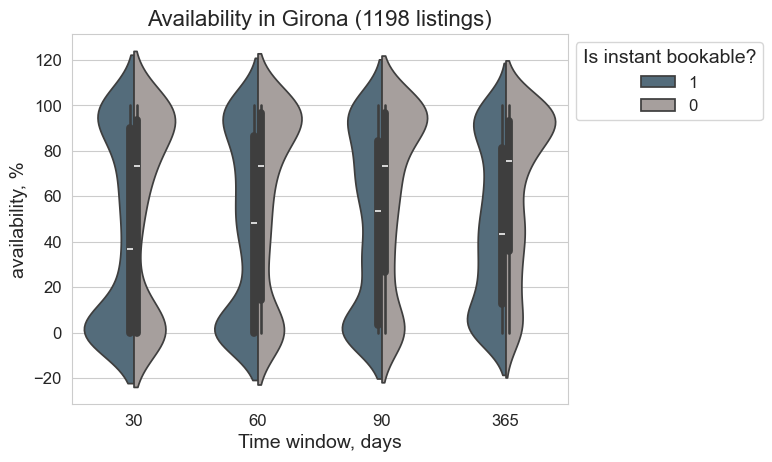

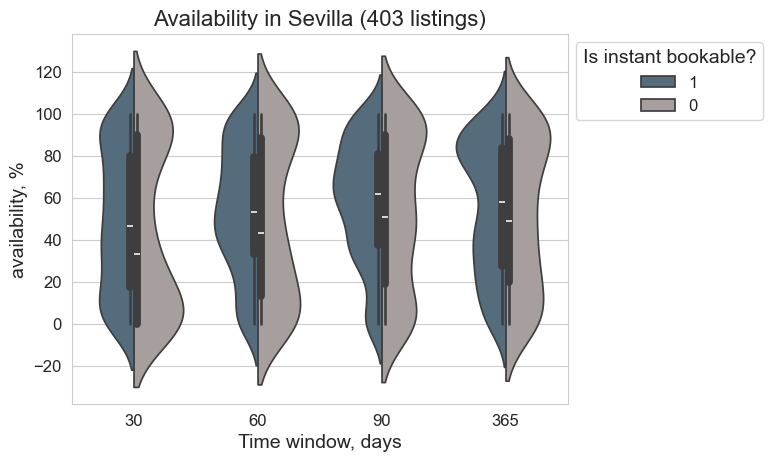

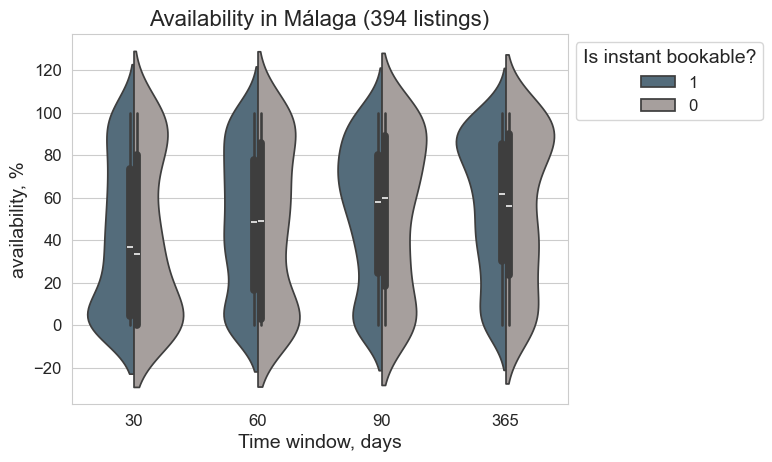

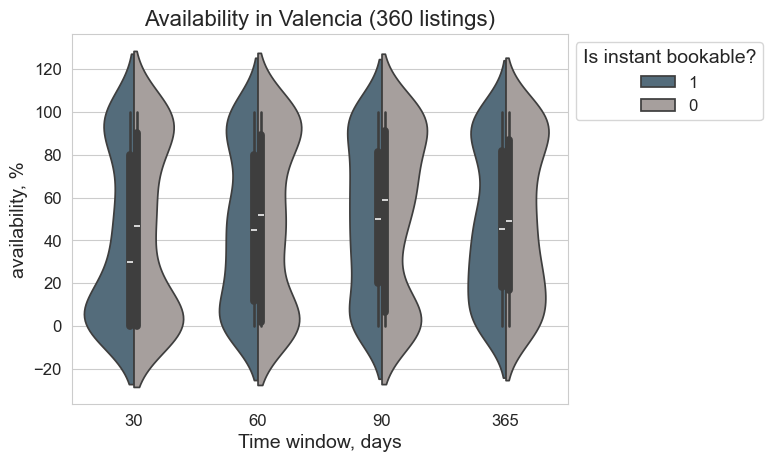

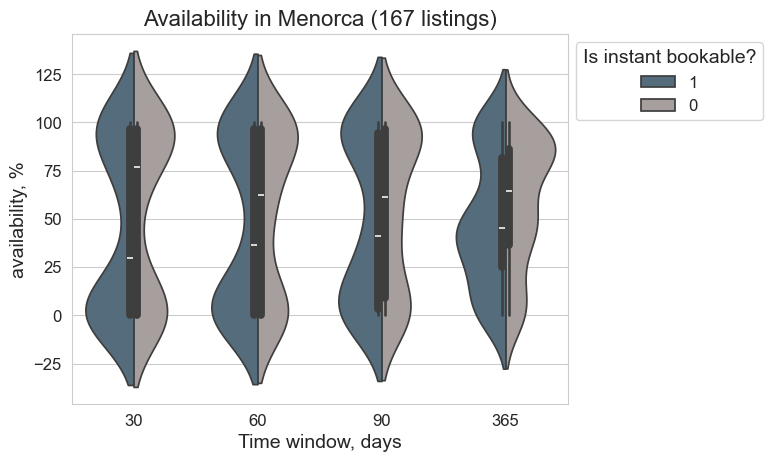

In [37]:
for city in df['city'].value_counts().index:
    
    # violin plot
    sns.violinplot(data=df_long.query('city==@city'), x='period', 
                   y='availability_percentage', 
                   hue='is_instant_bookable', split=True,
                   hue_order=[1,0])

    plt.title(f"Availability in {city} ({df['city'].value_counts()[city]} listings)")
    plt.xlabel('Time window, days')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title='Is instant bookable?')
    plt.ylabel('availability, %')
    plt.show()

In [38]:
for city in df['city'].value_counts().index:
    print()
    print(city)
    print('----------')
    for per in df_long['period'].unique():
        
        # two groups
        instant = df_long.query('period==@per and city==@city and is_instant_bookable==1')['availability']
        review = df_long.query('period==@per and city==@city and is_instant_bookable==0')['availability']
        
        u_stat, p_value = stats.mannwhitneyu(instant, review, alternative='two-sided')

        print('***')
        print(f'Availability across {per} days')
        print(f"Mann-Whitney U Test:")
        print(f"U Statistic = {u_stat}, P-value = {p_value}")
        if p_value < alpha:
            print("Reject null hypothesis\n")
        else:
            print("Fail to reject null hypothesis\n")        


Barcelona
----------
***
Availability across 30 days
Mann-Whitney U Test:
U Statistic = 648919.5, P-value = 0.4092417427114372
Fail to reject null hypothesis

***
Availability across 60 days
Mann-Whitney U Test:
U Statistic = 646707.0, P-value = 0.4991700817113981
Fail to reject null hypothesis

***
Availability across 90 days
Mann-Whitney U Test:
U Statistic = 648243.0, P-value = 0.439025897675693
Fail to reject null hypothesis

***
Availability across 365 days
Mann-Whitney U Test:
U Statistic = 670806.0, P-value = 0.025678289508432355
Reject null hypothesis


Madrid
----------
***
Availability across 30 days
Mann-Whitney U Test:
U Statistic = 357687.5, P-value = 0.010907355748016451
Reject null hypothesis

***
Availability across 60 days
Mann-Whitney U Test:
U Statistic = 361054.0, P-value = 0.0039417586784455845
Reject null hypothesis

***
Availability across 90 days
Mann-Whitney U Test:
U Statistic = 360012.5, P-value = 0.005727539904478922
Reject null hypothesis

***
Availability

## Conclusion and Recommendations

**General Observations:**  
- Peaks at Extremes: many objects show availability clustered around 0 days or near the upper limit of each period (30, 60, 90, 365 days). This suggests that properties are either almost fully booked or have very low booking activity, particularly in shorter periods like 30 days. The longer the period, the fewer properties remain fully booked.
- Average Availability Across Periods: the mean availability follows a consistent trend - on average, properties are available for booking about half of the time within each period. 30 days: 12 available days in average; 60 days: 27 days; 90 days: 44 days; 365 days: ~187 days.

**City-Level Availability Trends**:
- Lowest Availability: Madrid (10, 24, 40, and 164 days for 30, 60, 90, and 365 days, respectively), Barcelona (11, 26, 43, and 182 days)
- Highest Availability: Short-term (30 and 60 days): Girona and Menorca (15 and 31 days, respectively), long-term (365 days): Palma (211 days)



**Recommendation:** 
